In [1]:
import tensorflow as tf
import keras
import sys
sys.path.append("../helper")

from helperFunctions import walk_through_dir, plot_loss_curves, create_tensorboard_callback, compare_historys, custom_imgs, preprocessed_img_sparse, preprocessed_img_categorical

In [2]:
# Set up the directories
test_dir = "101_food_classes_10_percent/test"

In [3]:
# Turn them to batches
IMG_SIZE = (224, 224)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode="int",
                                                                shuffle=False) # Temporarily false

Found 25250 files belonging to 101 classes.


In [4]:
# Use if the files aren't local and downloaded from tfds
# test_data.map(preprocessed_img_sparse, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
model_external = tf.keras.models.load_model("./07_efficientnetb0_fine_tuned_101_classes_mixed_precision")

In [ ]:
for i, layer in enumerate(model_external.layers[1].layers):
    print(i, layer.name, layer.trainable)

In [26]:
model_external.evaluate(test_data)

790/790 [==============================] - 133s 159ms/step - loss: 1.1964 - accuracy: 0.7866


[1.1963942050933838, 0.7866138815879822]

In [5]:
model_final = tf.keras.models.load_model("../7_Transfer_Learning_Capstone_improvements\model_101_foods_augmented_dropout_103end_v2_adamax_best")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce GTX 1650, compute capability 7.5


In [6]:
model_final.evaluate(test_data)

790/790 [==============================] - 139s 166ms/step - loss: 0.8894 - accuracy: 0.7799


[0.8894472718238831, 0.7799208164215088]

In [7]:
model_final_improved = tf.keras.models.load_model("../7_Transfer_Learning_Capstone_improvements\model_101_foods_augmented_dropout_114end_v2_adamax")

In [8]:
model_final_improved.evaluate(test_data)

790/790 [==============================] - 134s 167ms/step - loss: 0.9186 - accuracy: 0.7712


[0.9185674786567688, 0.7712475061416626]

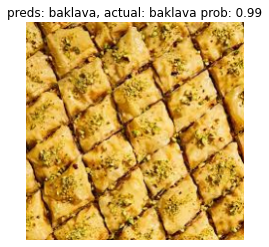

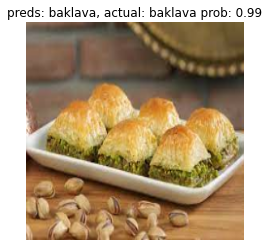

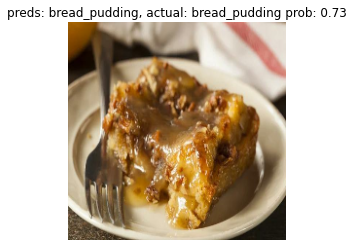

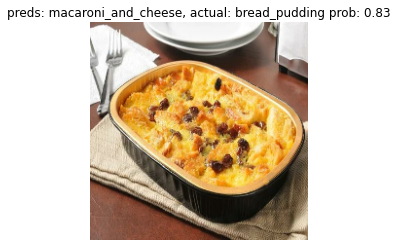

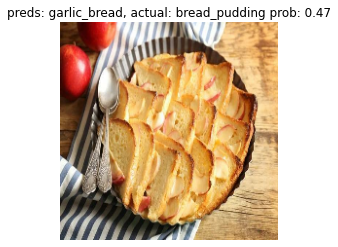

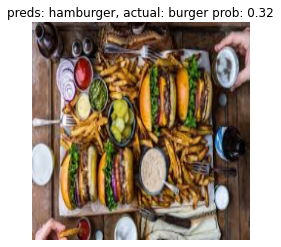

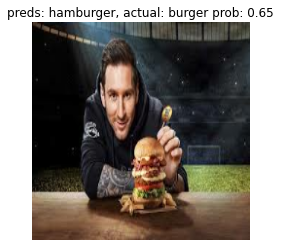

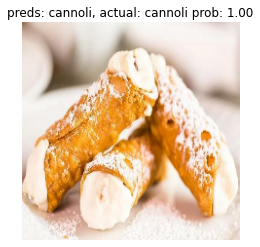

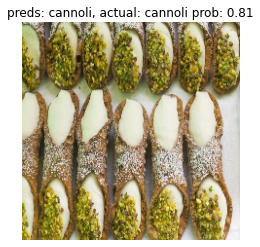

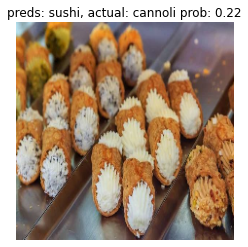

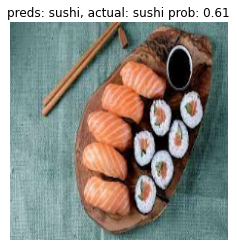

In [10]:
# Test out some custom images on the best performing model
# Use the helperFunction's custom_imgs function

imgs_path = "../6_Transfer Learning Part 3/custom_food_imgs"
class_names = test_data.class_names
custom_imgs(imgs_path, model_final, class_names, name_it=True)

In [10]:
# If the function doesn't work run this to check the pictures in your filepath
# and changing them to the correct extension
from image_processing import image_rename
image_rename(imgs_path=imgs_path)